# Splitting Data

Dimana pada dataset review gmaps pada restoran di Indonesia mempunyai jumlah sebanyak 2700 data. Dimana pada untuk dilakukan pembelajaran model dan pengujian model, dataset perlu dibagi menjadi 3 bagian:
1.   Training Data (80%) = 2160 data
2.   Validation Data (10%) = 270 data
3.   Testing Data (10%) = 270 data

Dimana terdapat 3 kategori restoran pada dataset yaitu:
1.   Restoral Lokal
2.   Restoran Mancanegara
3.   Restoran Seafood

Jika dibagi 3 kategori, maka pada tiap kategori memiliki jumlah data:
1.   Training Data = 720 data
2.   Validation Data = 90 data
3.   Testing Data = 90 data

Oleh karena itu, berikut pembagian data pada sub kategori:

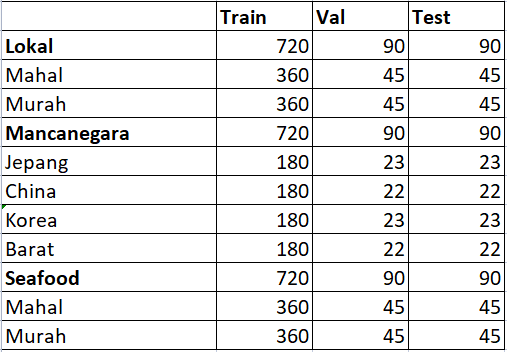




## Import Library

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import random
from collections import Counter
from google.colab import files

## Load Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Version Dataset
version = 2

# Path Folder
path_folder = '/content/drive/My Drive/Bismillah_Skripsi_Bisa_Amiiin/Data_Clean_v'+ str(version) + '/'

## Restoran Lokal
### Mahal
path_file_restoran_lokal_mahal = path_folder + 'lokal_mahal_' + str(version) + '_clean.xlsx'

### Murah
path_file_restoran_lokal_murah = path_folder + 'lokal_murah_' + str(version) + '_clean.xlsx'

## Restoran Mancaegara
### Jepang
path_file_restoran_mancanegara_jepang = path_folder + 'mancanegara_jepang_' + str(version) + '_clean.xlsx'

### China
path_file_restoran_mancanegara_china = path_folder + 'mancanegara_china_' + str(version) + '_clean.xlsx'

### Korea 
path_file_restoran_mancanegara_korea = path_folder + 'mancanegara_korea_' + str(version) + '_clean.xlsx'

### Barat
path_file_restoran_mancanegara_barat = path_folder + 'mancanegara_barat_' + str(version) + '_clean.xlsx'

## Restoran Seafood 
### Mahal
path_file_restoran_seafood_mahal = path_folder + 'seafood_mahal_' + str(version) + '_clean.xlsx'

### Murah
path_file_restoran_seafood_murah = path_folder + 'seafood_murah_' + str(version) + '_clean.xlsx'

In [ ]:
data_path = path_file_restoran_lokal_mahal
data_name = 'lokal_mahal'
train_data_name = data_name + '_train'
val_data_name = data_name + '_val'
test_data_name = data_name + '_test'
data = pd.read_excel(data_path)
data.head()

,Unnamed: 0,name,review_img_url,review_rating,review_text,review_date
0,0,Bebek Tepi Sawah Restaurant Ubud,https://lh5.googleusercontent.com/p/AF1QipPgsL...,2,tempat nya luas juga bersih untuk makanan nya ...,2022-09-24
1,1,Bebek Tepi Sawah Restaurant Ubud,https://lh5.googleusercontent.com/p/AF1QipOiXB...,2,suasana yang sejuk dan asri menambah nafsu mak...,2022-03-14
2,2,Bebek Tepi Sawah Restaurant Ubud,https://lh5.googleusercontent.com/p/AF1QipPiO2...,2,ramai enak cuma entah kenapa ga seeenak dulu p...,2022-04-23
3,3,Grand Garden Resto & Cafe,https://lh5.googleusercontent.com/p/AF1QipOhLM...,2,bernuansa taman dari rumah klasik dengan banya...,2019-06-27
4,4,Koenokoeni Cafe Gallery,https://lh5.googleusercontent.com/p/AF1QipMJKP...,2,various menu dapat welcome drink jamu dan snac...,2022-09-22


In [ ]:
#drop column with index 0 by index
data.drop(data.columns[[0]], axis=1, inplace=True)

In [ ]:
# Inisialisasi jumlah train, val, and test
# For restaurant sub kategori lokal_mahal, lokal_murah, seafood_mahal, seafood_murah
# train = 360 (120, 120, 120)
# val = 45 (15, 15, 15)
# test = 45 (15, 15, 15)

# For restaurant sub kategori mancanegara_jepang, mencanegara_korea
# train = 180 (60, 60, 60)
# val = 23 (8, 8, 7)
# test = 23 (8, 8, 7)

# For restaurant sub kategori mancanegara_china, mencanegara_barat
# train = 180 (60, 60, 60)
# val = 22 (8, 7, 7)
# test = 22 (8, 7, 7)

if(data_name in ('lokal_mahal', 'lokal_murah', 'seafood_mahal', 'seafood_murah')):
  num_train, num_val_pos, num_val_neu, num_val_neg = 120, 15, 15, 15
else:
  if(data_name in ('mancanegara_jepang', 'mancanegara_korea')):
    num_train, num_val_pos, num_val_neu, num_val_neg = 60, 8, 8, 7
  else:
    num_train, num_val_pos, num_val_neu, num_val_neg = 60, 8, 7, 7

In [ ]:
df_append = data.copy()
df_append.head()

,name,review_img_url,review_rating,review_text,review_date
0,Bebek Tepi Sawah Restaurant Ubud,https://lh5.googleusercontent.com/p/AF1QipPgsL...,2,tempat nya luas juga bersih untuk makanan nya ...,2022-09-24
1,Bebek Tepi Sawah Restaurant Ubud,https://lh5.googleusercontent.com/p/AF1QipOiXB...,2,suasana yang sejuk dan asri menambah nafsu mak...,2022-03-14
2,Bebek Tepi Sawah Restaurant Ubud,https://lh5.googleusercontent.com/p/AF1QipPiO2...,2,ramai enak cuma entah kenapa ga seeenak dulu p...,2022-04-23
3,Grand Garden Resto & Cafe,https://lh5.googleusercontent.com/p/AF1QipOhLM...,2,bernuansa taman dari rumah klasik dengan banya...,2019-06-27
4,Koenokoeni Cafe Gallery,https://lh5.googleusercontent.com/p/AF1QipMJKP...,2,various menu dapat welcome drink jamu dan snac...,2022-09-22


In [ ]:
df_append.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            450 non-null    object        
 1   review_img_url  450 non-null    object        
 2   review_rating   450 non-null    int64         
 3   review_text     450 non-null    object        
 4   review_date     450 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 17.7+ KB


## Set Train Index

In [ ]:
# mendapatkan data dengan rating 0
rat_neg = df_append.index[(df_append['review_rating']==0)].to_list()
# mengambil data random sebanyak num_train dari data rating negatif
rat_neg_train = random.sample(rat_neg, num_train)
rat_neg_train = set(rat_neg_train)
rat_neg_train = list(rat_neg_train)

# mendapatkan data dengan rating 1
rat_neu = df_append.index[(df_append['review_rating']==1)].to_list()
# mengambil data random sebanyak num_train dari data rating neutral
rat_neu_train = random.sample(rat_neu, num_train)
rat_neu_train = set(rat_neu_train)
rat_neu_train = list(rat_neu_train)

# mendapatkan data dengan rating 2
rat_pos = df_append.index[(df_append['review_rating']==2)].to_list()
# mengambil data random sebanyak num_train dari data rating positif
rat_pos_train = random.sample(rat_pos, num_train)
rat_pos_train = set(rat_pos_train)
rat_pos_train = list(rat_pos_train)

# indeks gabungan train index
gab_pos_neu_neg_train = rat_pos_train + rat_neu_train + rat_neg_train

print('Rating Negative : ')
print(rat_neg_train)
print(len(rat_neg_train),'\n')

print('Rating Neutral : ')
print(rat_neu_train)
print(len(rat_neu_train),'\n')

print('Rating Positive : ')
print(rat_pos_train)
print(len(rat_pos_train),'\n')

print('Rating Gabungan : ')
print(gab_pos_neu_neg_train)
print(len(gab_pos_neu_neg_train),'\n')


Rating Negative : 
[300, 301, 302, 303, 304, 305, 307, 309, 310, 311, 312, 314, 315, 316, 317, 319, 321, 322, 323, 324, 325, 326, 327, 328, 331, 332, 333, 334, 335, 336, 337, 340, 341, 342, 343, 345, 346, 347, 348, 350, 351, 352, 353, 355, 356, 357, 358, 359, 363, 364, 365, 368, 369, 370, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 386, 387, 388, 389, 391, 392, 393, 395, 396, 397, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 414, 415, 416, 417, 418, 419, 421, 422, 423, 425, 426, 427, 428, 429, 430, 432, 433, 434, 435, 438, 439, 440, 441, 442, 443, 444, 446, 447, 448, 449]
120 

Rating Neutral : 
[150, 152, 153, 155, 156, 157, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 

In [ ]:
len(rat_neg)

150

## Complement Train Index for Validation and Testing Index

In [ ]:
# Positive
c5 = Counter(np.array(rat_pos))
c6 = Counter(np.array(rat_pos_train))

# Neutral
c3 = Counter(np.array(rat_neu))
c4 = Counter(np.array(rat_neu_train))

# Negative
c1 = Counter(np.array(rat_neg))
c2 = Counter(np.array(rat_neg_train))

# Complement
diff_pos = c1 - c2
diff_neu = c3 - c4
diff_neg = c5 - c6

# filter index for validation and testing data
rat_pos_val_test = list(diff_pos.elements())
rat_neu_val_test = list(diff_neu.elements())
rat_neg_val_test = list(diff_neg.elements())

print('rat_pos_val_test ',len(rat_pos_val_test),' : ',rat_pos_val_test)
print('rat_neu_val_test ',len(rat_neu_val_test),' : ',rat_neu_val_test)
print('rat_neg_val_test ',len(rat_neg_val_test),' : ',rat_neg_val_test)

rat_pos_val_test  30  :  [306, 308, 313, 318, 320, 329, 330, 338, 339, 344, 349, 354, 360, 361, 362, 366, 367, 371, 385, 390, 394, 398, 408, 413, 420, 424, 431, 436, 437, 445]
rat_neu_val_test  30  :  [151, 154, 158, 164, 172, 175, 180, 181, 182, 191, 199, 203, 206, 216, 235, 246, 247, 250, 252, 253, 256, 261, 262, 264, 269, 272, 279, 287, 290, 291]
rat_neg_val_test  30  :  [2, 7, 8, 12, 18, 19, 28, 32, 41, 47, 52, 56, 58, 60, 71, 74, 76, 78, 79, 85, 111, 123, 125, 127, 130, 133, 140, 141, 146, 149]


## Set Validation Index

In [ ]:
# mendapatkan data dengan rating 1
# mengambil data random sebanyak num_val dari data rating negatif
rat_neg_val = random.sample(rat_neg_val_test, num_val_pos)
rat_neg_val = set(rat_neg_val)
rat_neg_val = list(rat_neg_val)

# mendapatkan data dengan rating 3
# mengambil data random sebanyak num_val dari data rating neutral
rat_neu_val = random.sample(rat_neu_val_test, num_val_neu)
rat_neu_val = set(rat_neu_val)
rat_neu_val = list(rat_neu_val)

# mendapatkan data dengan rating 4 atau 5
# mengambil data random sebanyak num_val dari data rating positif
rat_pos_val = random.sample(rat_pos_val_test, num_val_neg)
rat_pos_val = set(rat_pos_val)
rat_pos_val = list(rat_pos_val)

# indeks gabungan validation index
gab_pos_neu_neg_val = rat_pos_val + rat_neu_val + rat_neg_val

print('Rating Negative : ')
print(rat_neg_val)
print(len(rat_neg_val),'\n')

print('Rating Neutral : ')
print(rat_neu_val)
print(len(rat_neu_val),'\n')

print('Rating Positive : ')
print(rat_pos_val)
print(len(rat_pos_val),'\n')

print('Rating Gabungan : ')
print(gab_pos_neu_neg_val)
print(len(gab_pos_neu_neg_val),'\n')

Rating Negative : 
[32, 130, 7, 8, 74, 140, 28, 79, 111, 18, 146, 56, 60, 125, 127]
15 

Rating Neutral : 
[256, 291, 164, 262, 199, 154, 203, 269, 175, 272, 246, 216, 250, 252, 191]
15 

Rating Positive : 
[320, 385, 354, 420, 424, 361, 394, 431, 367, 338, 339, 436, 344, 349, 445]
15 

Rating Gabungan : 
[320, 385, 354, 420, 424, 361, 394, 431, 367, 338, 339, 436, 344, 349, 445, 256, 291, 164, 262, 199, 154, 203, 269, 175, 272, 246, 216, 250, 252, 191, 32, 130, 7, 8, 74, 140, 28, 79, 111, 18, 146, 56, 60, 125, 127]
45 



## Set Testing Index

In [ ]:
# Positive
c7 = Counter(np.array(rat_pos_val_test))
c8 = Counter(np.array(rat_pos_val))

# Neutral
c9 = Counter(np.array(rat_neu_val_test))
c10 = Counter(np.array(rat_neu_val))

# Negative
c11 = Counter(np.array(rat_neg_val_test))
c12 = Counter(np.array(rat_neg_val))

# Complement
diff_pos = c7 - c8
diff_neu = c9 - c10
diff_neg = c11 - c12

# filter index for validation and testing data
rat_pos_test = list(diff_pos.elements())
rat_neu_test = list(diff_neu.elements())
rat_neg_test = list(diff_neg.elements())

# indeks gabungan test index
gab_pos_neu_neg_test = rat_pos_test + rat_neu_test + rat_neg_test

print('rat_pos_test ',len(rat_pos_test),' : ',rat_pos_test)
print('rat_neu_test ',len(rat_neu_test),' : ',rat_neu_test)
print('rat_neg_test ',len(rat_neg_test),' : ',rat_neg_test)
print('gab_pos_neu_neg_test ',len(gab_pos_neu_neg_test),' : ',gab_pos_neu_neg_test)

rat_pos_test  15  :  [306, 308, 313, 318, 329, 330, 360, 362, 366, 371, 390, 398, 408, 413, 437]
rat_neu_test  15  :  [151, 158, 172, 180, 181, 182, 206, 235, 247, 253, 261, 264, 279, 287, 290]
rat_neg_test  15  :  [2, 12, 19, 41, 47, 52, 58, 71, 76, 78, 85, 123, 133, 141, 149]
gab_pos_neu_neg_test  45  :  [306, 308, 313, 318, 329, 330, 360, 362, 366, 371, 390, 398, 408, 413, 437, 151, 158, 172, 180, 181, 182, 206, 235, 247, 253, 261, 264, 279, 287, 290, 2, 12, 19, 41, 47, 52, 58, 71, 76, 78, 85, 123, 133, 141, 149]


## Fetch Data Training, Validation, and Testing with Index

In [ ]:
train_data = df_append.loc[gab_pos_neu_neg_train]
val_data = df_append.loc[gab_pos_neu_neg_val]
test_data = df_append.loc[gab_pos_neu_neg_test]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 449
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            360 non-null    object        
 1   review_img_url  360 non-null    object        
 2   review_rating   360 non-null    int64         
 3   review_text     360 non-null    object        
 4   review_date     360 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 16.9+ KB


In [ ]:
train_data.head()

,name,review_img_url,review_rating,review_text,review_date
0,Bebek Tepi Sawah Restaurant Ubud,https://lh5.googleusercontent.com/p/AF1QipPgsL...,2,tempat nya luas juga bersih untuk makanan nya ...,2022-09-24
1,Bebek Tepi Sawah Restaurant Ubud,https://lh5.googleusercontent.com/p/AF1QipOiXB...,2,suasana yang sejuk dan asri menambah nafsu mak...,2022-03-14
3,Grand Garden Resto & Cafe,https://lh5.googleusercontent.com/p/AF1QipOhLM...,2,bernuansa taman dari rumah klasik dengan banya...,2019-06-27
4,Koenokoeni Cafe Gallery,https://lh5.googleusercontent.com/p/AF1QipMJKP...,2,various menu dapat welcome drink jamu dan snac...,2022-09-22
5,Koenokoeni Cafe Gallery,https://lh5.googleusercontent.com/p/AF1QipNxEU...,2,tempatnya artsy makanannya enak makanan indone...,2022-06-01


In [ ]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 320 to 127
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            45 non-null     object        
 1   review_img_url  45 non-null     object        
 2   review_rating   45 non-null     int64         
 3   review_text     45 non-null     object        
 4   review_date     45 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ KB


In [ ]:
val_data.head()

,name,review_img_url,review_rating,review_text,review_date
320,Pesta Keboen Restoran,https://lh5.googleusercontent.com/p/AF1QipO02g...,0,salah satu tempat makan di semarang yang bernu...,2017-02-17
385,ABHAYAGIRI - Venue and Dining,https://lh5.googleusercontent.com/p/AF1QipM8Ul...,0,paraaah ga bisa ala carte only buffet setau sa...,2019-05-04
354,RM. Ampera 2 Tak,https://lh5.googleusercontent.com/p/AF1QipMMA4...,0,i srlsy do not understand why my friends rekom...,2022-12-29
420,Gudeg Bu Hj. Amad,https://lh5.googleusercontent.com/p/AF1QipPSkU...,0,gudek kering yang enak jika tidak terlalu mani...,2018-05-28
424,Gudeg Bu Hj. Amad,https://lh5.googleusercontent.com/p/AF1QipMSYe...,0,beli paket c besek rb gudegnya dikit banget g...,2021-12-24


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 306 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            45 non-null     object        
 1   review_img_url  45 non-null     object        
 2   review_rating   45 non-null     int64         
 3   review_text     45 non-null     object        
 4   review_date     45 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ KB


In [ ]:
test_data.head()

,name,review_img_url,review_rating,review_text,review_date
306,Koenokoeni Cafe Gallery,https://lh5.googleusercontent.com/p/AF1QipMdUy...,0,baru x makan disini even lebaran ramai dan la...,2022-05-02
308,Koenokoeni Cafe Gallery,https://lh5.googleusercontent.com/p/AF1QipMVWf...,0,penyajian luama waiters dikit tok jadi kalau b...,2022-02-26
313,Pesta Keboen Restoran,https://lh3.googleusercontent.com/a-/ACNPEu_qH...,0,makanan nya datang nya lama banget sampai seja...,2022-07-06
318,Pesta Keboen Restoran,https://lh5.googleusercontent.com/p/AF1QipOv7A...,0,pelayannya ramah tapi pelayanan untuk penyajia...,2021-04-29
329,Konro Karebosi,https://lh5.googleusercontent.com/p/AF1QipOGJI...,0,konronya lumayan ini restoran terkenal seindon...,2017-11-01


In [ ]:
# Define function export data to export dataframe to csv file
def export_data(df,data_name):
  name_file = data_name+'.xlsx'
  df.to_excel(name_file)
  files.download(name_file)
  msg = 'Success Export Data'
  return msg

In [ ]:
# Export data train
export_data(train_data,train_data_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Success Export Data'

In [ ]:
# Export data validation
export_data(val_data,val_data_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Success Export Data'

In [ ]:
# Export data validation
export_data(test_data,test_data_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Success Export Data'